Python program for generating the histogram from an exponential data set

In [1]:
from random import expovariate
from matplotlib.pyplot import hist, xlabel, ylabel, title, show, savefig

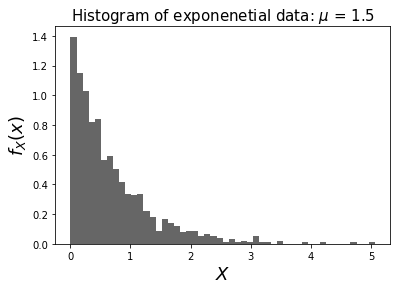

In [4]:
# Generating the data set
N = 1000
data = [expovariate(1.5) for i in range(N)]

# Decide number of bins
num_bins = 50

# Construct the histogram of the data
# To generate PDF, use density=True (not 'normed')
n, bins, patches = hist(data, num_bins, density=True,
                       facecolor='black', alpha=0.6)

xlabel('$X$', size=18)
ylabel('$f_X(x)$', size=18)
title('Histogram of exponenetial data: $\mu$ = 1.5', size = 15)

# Show the figure or save it
# savefig('hist_expov.pdf', format='pdf', bbox=inches='tight')
show()

## Plotting the CDF and PDF of uniform random variable

In [5]:
from numpy import *
from matplotlib.pyplot import *

<ipython-input-6-05aa4ec3b676>:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plot(X, Y, Linewidth=2, color="b")


Text(0, 0.5, '$f_X(x)$')

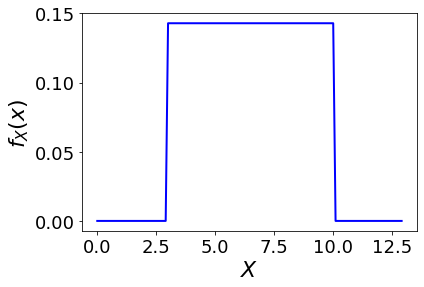

In [6]:
# Parameters
a = 3
b = 10

# Plotting the pdf
def pdf(x):
    if x >= a and x <= b:
        return 1 / (b-a)
    else:
        return 0
    

X = arange(0, b+3, 0.1)
Y = []

for x in X:
    Y.append(pdf(x))
    
matplotlib.rc("xtick", labelsize=18)
matplotlib.rc("ytick", labelsize=18)
plot(X, Y, Linewidth=2, color="b")
xlabel("$X$", size=22)
ylabel("$f_X(x)$", size=22)
# show()

<ipython-input-8-801af6637e5f>:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plot(X, Y, Linewidth=2, color="black")


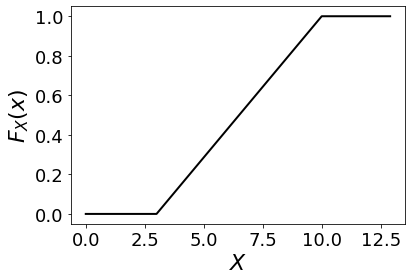

In [8]:
# Plotting the CDF
def cdf(x):
    if x < a:
        return 0
    elif x >= a and x < b:
        return (x - a) / (b - a)
    elif x >= b:
        return 1
    
X = arange(0, b+3, 0.1)
Y = []

for x in X:
    Y.append(cdf(x))

    
matplotlib.rc("xtick", labelsize=18)    
matplotlib.rc("ytick", labelsize=18)    
plot(X, Y, Linewidth=2, color="black")
xlabel("$X$", size=22)
ylabel("$F_X(x)$", size=22)

show()
# savefig("uniform_cdf.pdf", format="pdf", bbox_inches="tight")

# Simulating a two-state discrete time Markov Chain

In [13]:
from random import random

n = 10
S = []

S.append("G")  # Initial state

for i in range(n):
    u = random()
    if S[i] == "G":
        if u < 0.5:
            S.append("G")
        else:
            S.append("B")
    elif S[i] == "B":
        if u < 0.7:
            S.append("G")
        else:
            S.append("B")
    else:
        print("Input not recognized")
        break

print("Sample Path: ", S)

Sample Path:  ['G', 'G', 'G', 'G', 'G', 'B', 'B', 'G', 'G', 'B', 'G']


# Simulating a Poisson Process

In [18]:
from random import expovariate

Avg_IAT = 2.0  # Average IAT
Sim_Time = 100  # Total simulation time
N = 0  # Count number of arrival
clock = 0  # Simulation time

while clock <= Sim_Time:
    N = N + 1
    # Advance simulation clock
    clock = clock + expovariate(1/Avg_IAT)

print("Total Number of Arrivals = ", N)

Total Number of Arrivals =  47


# Simulating a Birth-Death process

<ipython-input-19-63f08d12ec24>:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  step(X, Y, Linewidth=1.2, color="black")


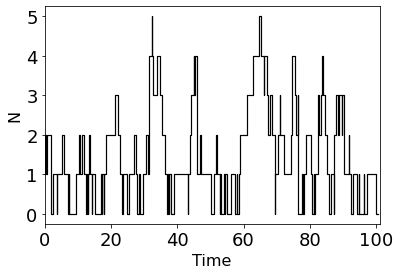

In [19]:
from random import expovariate
from matplotlib.pyplot import *

Avg_IAT = 2.0
Avg_ST = 1.0  # Average Service Time
Sim_Time = 100  # Total simulation time
N = 0
clock = 0
X = []  # Times of event
Y = []  # Values of N

while clock <= Sim_Time:
    IAT = expovariate(1 / Avg_IAT)
    ST = expovariate(1 / Avg_ST)
    if IAT <= ST:
        N += 1
        clock = clock + IAT
        X.append(clock)
        Y.append(N)
    else:
        if N > 0:
            N -= 1
            clock = clock + ST
            X.append(clock)
            Y.append(N)

step(X, Y, Linewidth=1.2, color="black")
xlabel("Time", size=16)
ylabel("N", size=16)
xlim(0, 101)

show()
# savefig("sim_birth_death_process.pdf", format="pdf", bbox_inches="tight")